@Author: Ayush Prajapati<br>
@Date: 27-09-2024<br>
@Last Modified by: Ayush Prajapati<br>
@Last Modified time: 27-09-2024 <br>
@Title: Python program to predict temperature
        using `Simple Linear Regression`<br>

<br>**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<br>**Importing Dataset**

In [45]:
weather_df = pd.read_csv('weatherHistory.csv')
display(weather_df.head())

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<br>**Structure and Stats of the dataset**

In [25]:
weather_df.info()
print("\nStats for the dataset are:")
weather_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB

Stats for the dataset are:


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [26]:
weather_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

<br>**Visualize the relationship between years of experience and salary**

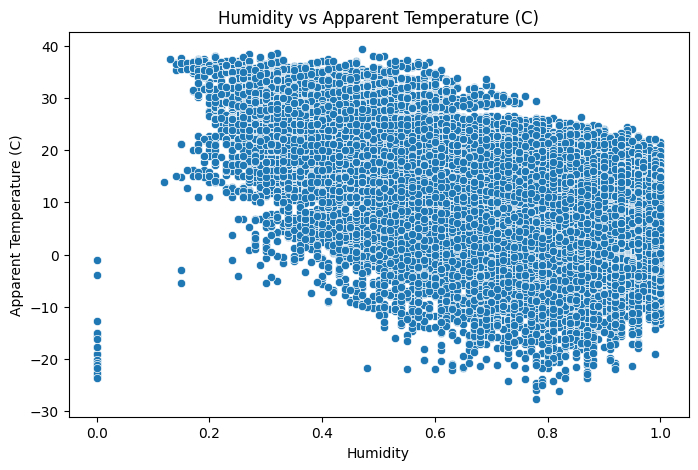

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Humidity', y='Apparent Temperature (C)', data=weather_df)
plt.title('Humidity vs Apparent Temperature (C)')
plt.show()

<br>**Check Correlation**

In [13]:
correlation = weather_df[['Humidity', 'Apparent Temperature (C)']].corr()
print(correlation)

                          Humidity  Apparent Temperature (C)
Humidity                  1.000000                 -0.602571
Apparent Temperature (C) -0.602571                  1.000000


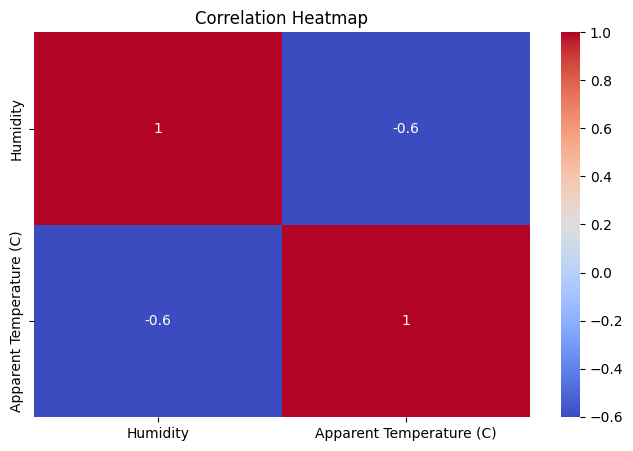

In [15]:
# Heatmap to check correlation
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


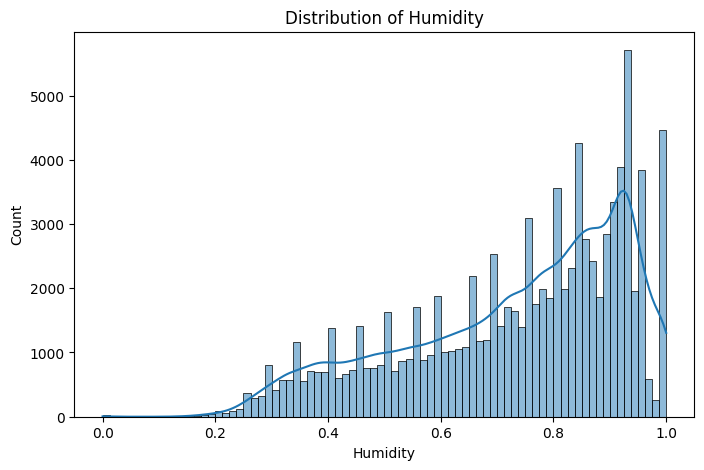

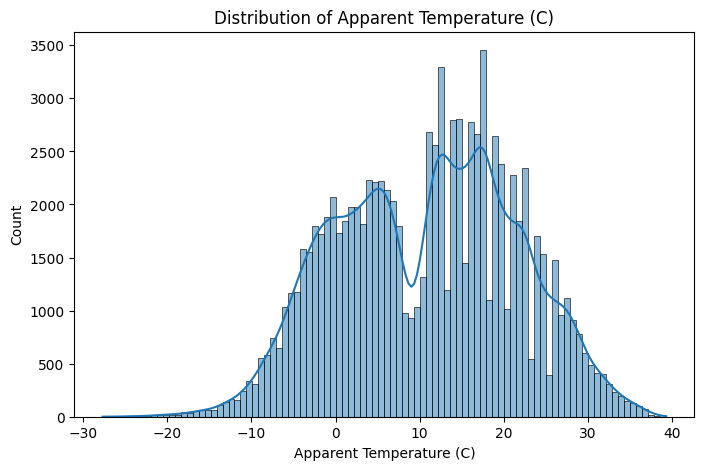

In [16]:
# Histogram of Humidity
plt.figure(figsize=(8, 5))
sns.histplot(weather_df['Humidity'], kde=True)
plt.title('Distribution of Humidity')
plt.show()

# Histogram of Years of Experience
plt.figure(figsize=(8, 5))
sns.histplot(weather_df['Apparent Temperature (C)'], kde=True)
plt.title('Distribution of Apparent Temperature (C)')
plt.show()

**Box plot for detecting outliers**

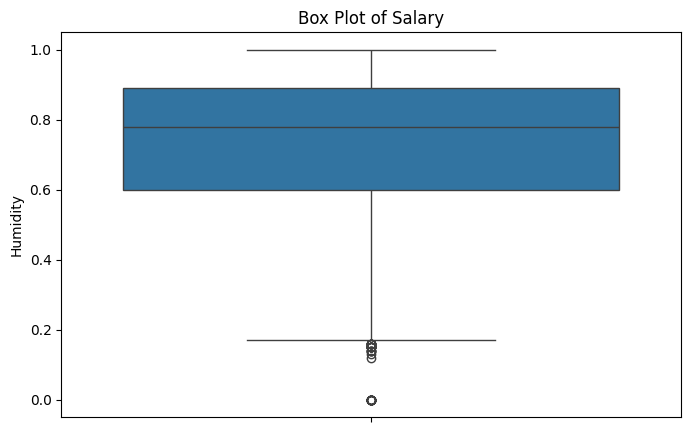

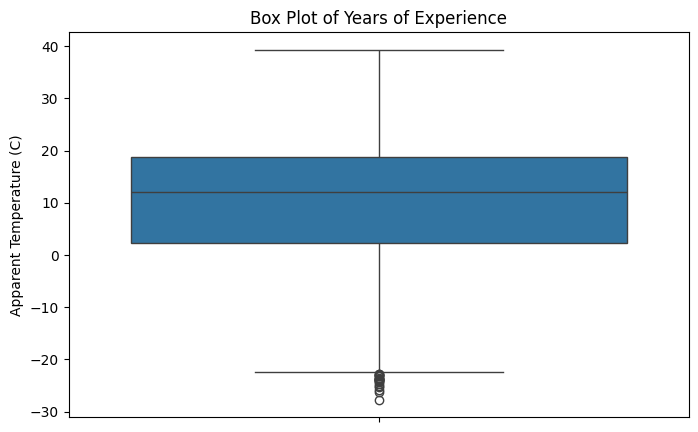

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=weather_df['Humidity'])
plt.title('Box Plot of Salary')
plt.show()

# Box plot for Years of Experience
plt.figure(figsize=(8, 5))
sns.boxplot(y=weather_df['Apparent Temperature (C)'])
plt.title('Box Plot of Years of Experience')
plt.show()


**Removing Outliers**

In [47]:
Q1 = weather_df['Humidity'].quantile(0.25)
Q3 = weather_df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

clean_df = weather_df[(weather_df['Humidity'] > lb) & (weather_df['Humidity'] < ub)]

In [48]:
Q1 = clean_df['Apparent Temperature (C)'].quantile(0.25)
Q3 = clean_df['Apparent Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

clean_df = clean_df[(clean_df['Apparent Temperature (C)'] > lb) & (clean_df['Apparent Temperature (C)'] < ub)]

In [49]:
clean_df.shape

(96389, 12)

**Box plot for checking outliers**

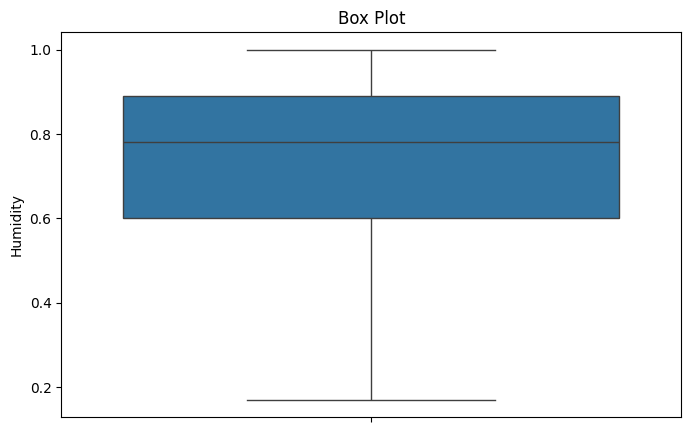

In [83]:
plt.figure(figsize=(8, 5))
sns.boxplot(clean_df['Humidity'])
plt.title('Box Plot')
plt.show()

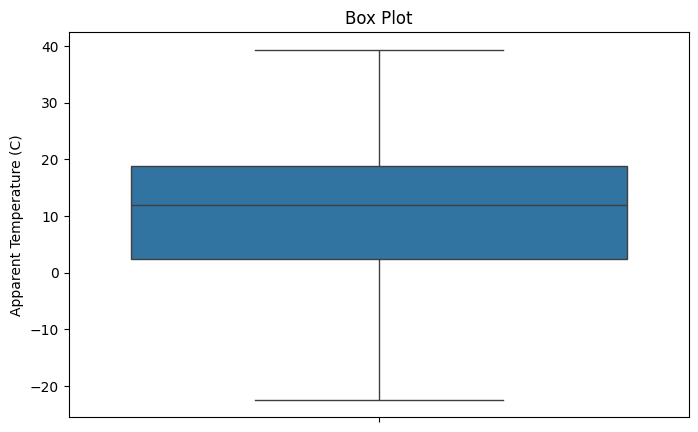

In [84]:
plt.figure(figsize=(8, 5))
sns.boxplot(clean_df['Apparent Temperature (C)'])
plt.title('Box Plot')
plt.show()

<br>**Splitting the Data into Train and Test sets**

In [70]:
X = clean_df[['Humidity']]
y = clean_df[['Apparent Temperature (C)']]

<br>**Scale the feature (YearsExperience) and target (Salary)**

In [71]:
scaler = StandardScaler()

In [72]:
X_scaled = scaler.fit_transform(X)

<br>**Train Test Split**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [74]:
print(f"X_train Shape {X_train.shape}, X_test shape {X_test.shape}")
print(f"y_train Shape_{y_train.shape}, y_test shape {y_test.shape}")

X_train Shape (77111, 1), X_test shape (19278, 1)
y_train Shape_(77111, 1), y_test shape (19278, 1)


<br>**Fit the linear regression model**

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<br>**Make Prediction**

In [76]:
y_pred = model.predict(X_test)

<br>**Accuracy Metrics**

In [77]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R Square: {r2}')


Mean Squared Error: 72.06911000865394
Root Mean Squared Error: 8.489352743799373
R Square: 0.367405596865236


<br>**Inverse transform the predicted salaries back to original scale**

In [79]:
X_test = scaler.inverse_transform(X_test)

<br>**Plotting the original data and the regression line**

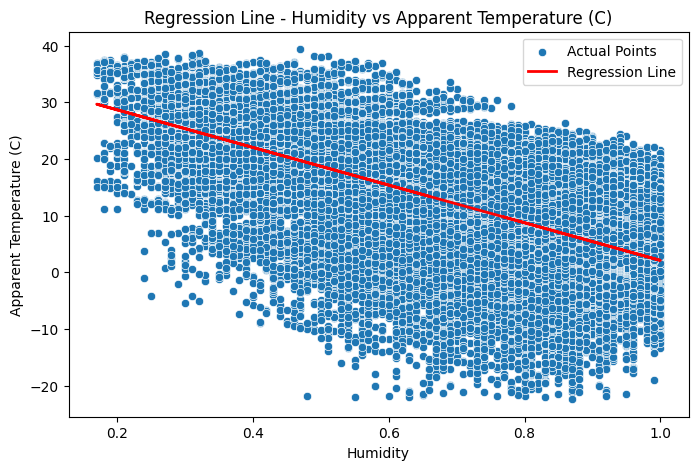

In [80]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Humidity', y='Apparent Temperature (C)', data=clean_df, label = 'Actual Points')
 
# plt.scatter(x = X_test, y=y_test_orignal)
plt.plot(X_test, y_pred, color='red', linewidth=2, label = "Regression Line")
plt.title('Regression Line - Humidity vs Apparent Temperature (C)')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.legend()
plt.show()